# Introduction to Machine and Deep Learning

## Overview

This notebook comprises a quick, non-exhaustive introduction to fundamental concepts in both machine and deep learning. We aim to familiarize you with these concepts in the hopes that you will build upon them to further your own understanding and capabilities in machine and deep learning.

### What's Covered
Key concepts covered in this tutorial include:
* Regression
* Classification
* Loss Functions
* Validation & Overfitting 
* Hyperparameter tuning
* Gradient Descent & Optimization
* Neural Networks

### What's Not
We will use a variety of different python libraries in this tutorial, including specific frameworks for data processing and machine and deep learning. The syntax, functionality, and APIs behind these frameworks is not our focus for this introduction. However, we encourage you to learn more about them, as they are essential components of the ML practitioner's toolkit.

These libraries include:
* [numpy](https://docs.scipy.org/doc/numpy-1.15.1/reference/index.html)
* [pandas](https://pandas.pydata.org/pandas-docs/stable/)
* [matplotlib](https://matplotlib.org/)
* [scikit-learn](https://scikit-learn.org/stable/)
* [tensorflow](https://www.tensorflow.org/)
* [keras](https://keras.io/)

### What's Expected

This tutorial will assume you have some experience with numpy and data structures.

## Contents

This tutorial consists of three parts:

* Machine Learning
 * Part 1: Linear Regression
 * Part 2: Decision Tree Classification
* Deep Learning 
 * Multi-Layer Perceptron (MLP)

## Jupyter Notebook

This tutorial is executed in a specific IDE call a **Jupyter Notebook**. If you know what a Jupyter Notebook is, please **skip to the next section**.

A Jupyter Notebook is "[an open-source web application that allows you to create and share documents that contain live code, equations, visualizations and narrative text](https://jupyter.org/). It's an IDE that is commonly used by Data Scientists that simplifies exploratory data analysis (EDA) and experimentation. 

The notebook application allows you to execute **code cells** interactively. As an example, execute the code cell below by selecting the cell and clicking the **Run** button above (or using the appropriate hot key).

In [2]:
print("Hello world!")

Hello world!


The notebook executes the code cell, and prints outputs beneath the code cell.

The notebook sits on top of a python kernel that maintains state throughout the lifetime of the notebook. When we execute the code block below, we assign 5 and 6 to variables <tt>a</tt> and <tt>b</tt> respectively

In [6]:
a = 5
b = 6
a+b

11

Now, when we run the next cell block repeatedly, we get incrementally higher values of <tt>a</tt> because the kernel is keeping track of the value of <tt>a</tt> as if you were running this in any other environment.

In [13]:
a += 1
a

12

It's important when working through the tutorial notebook to remember that you need to execute blocks in order as if they were in a script.

The numbers in brackets next to each code cell indicate the relative order of execution; while a block is executing, you'll see an asterisk **\*** in the brackets.

As an example, execute the next cell. This will kick off an infinite loop, but you can interrupt the kernel at anytime by pressing the **stop** button above.

In [15]:
while True:
    continue

KeyboardInterrupt: 

# Imports

In [ ]:
!conda install python-graphviz -y

Solving environment: | 

In [145]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes, load_iris
import graphviz
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
# %matplotlib inline

from IPython.display import HTML

# Machine Learning

Before we start looking at machine and deep learning, it's important to understand the relationship between each and AI as a whole. Artifical intelligence, machine learning, and deep learning overlap, and subset each other from right to left. Let's broadly define each here:
* **Artificial Intelligence**: Techniques and methods used to enable computer systems to perform complex tasks that are perceivable as *intelligent*.
* **Machine Learning**: Algorithms and statistical models that accomplish the above via modeling and inference techniques, as opposed to *rule-based* systems
* **Deep Learning**: A class of machine learning algorithms called *neural networks* that are state-of-the-art at many tasks such as computer-vision and natural language processing (NLP) 

<img src="https://user-images.githubusercontent.com/36491325/51944421-de39a400-23d0-11e9-8fde-28a2f75b2a7f.png" width="400" height="400" />

Simply put, machine learning models perform intelligent tasks and provide intelligent insights by *learning* them from **data**, instead of relying on hand-crafted rules and logic. Deep learning concerns a particular class of models called neural networks. Managing and tuning this learning process is a core part of what it means to practice machine learning.

There are many different machine learning models and different tasks. When those tasks are to make predictions, machine learning models typically learn how to do this by looking at examples; these are **observations** with corresponding **labels**. This method of learning is called **supervised learning**, and is our focus.

In this section of this tutorial, we will focus on two different machine learning **algorithms/models** for two different machine learning **tasks**:
* **linear models** for **regression**
* **decision trees** for **classification**


## Part 1: Linear Regression

Using linear models for regression, or simply linear regression, has a long history in statistical analysis and is so well known that many don't realize it is in fact one of the simplest examples of machine learning. 

In **linear regression**, our model describes a linear relationship between a **label**, which we call a **target**, and a set of **observations**, which we call features. Recall the equation of a line: 

$y=mx + b$

The **parameters** $m$ and $b$ describe the relationship between the **feature** $x$ and the **target** $y$. 

Let's create a function for this linear model:

In [2]:
def create_linear_model(params={"m":1.0, "b":0.0}):
    return lambda x: params['m']*x + params['b']

To understand how the ML process works, we're going to work backwards from a working model.

### Linear Model with Known Parameters

Let's say we want to create a linear model to describe the relationship between the age of adolescent boys and their height. **Assume** we know that the average height of boys increases by 2 inches for each year between 11 and 18, and the average height at age 11 is 55 inches.

If feature $x$ represents years after 11, and $y$ represents height in inches, then we can say that parameter $m$ is 0.5 and the parameter $b$ is 55.

In [3]:
boy_height_params = {"m":2.0, "b":55.0}
boy_height_linear_model = create_linear_model(boy_height_params)

Now we can use our model to make a prediction on an input feature. This process of making predictions on new values is called **inference**.

**Try predicting for different values of <tt>x</tt> between 0 and 7:**

In [4]:
x = 2
y = boy_height_linear_model(x)
print(f"Linear model predicted a height of {y // 12} ft, {y % 12} inches for a {x+11}-year-old boy")

Linear model predicted a height of 4.0 ft, 11.0 inches for a 13-year-old boy


Let's plot this line over a range of values:

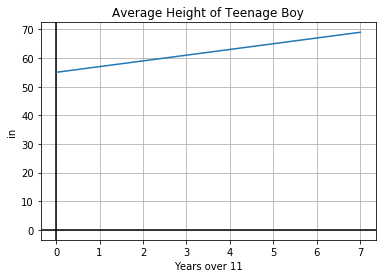

In [6]:
fig, ax = plt.subplots()
ax.grid(True, which='both')

ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.set_xlabel("Years over 11")
ax.set_ylabel("in")
ax.set_title("Average Height of Teenage Boy")
ax.plot(list(range(8)), [boy_height_linear_model(i) for i in range(8)])

Great, we have a working linear model that describes the relationship between teenage boys age and their average height. 

### Linear Model with Unknown Parameters

We got the model in the previous section because we were able to figure out what the **parameters** $m$ and $b$ are, based on an **assumption** we made about the relationship between the feature $x$ and target $y$. In reality, we never know what the right parameters are, we have to **learn** them by looking at historical data or observations.

Let's look at an example of what real data would look like by loading a sample diabetes dataset from the sci-kit learn library:

In [7]:
diabetes_dataset = load_diabetes()

Let's look at the description of the dataset features (called attributes) and target:

In [8]:
print(diabetes_dataset['DESCR'])

Diabetes dataset

Notes
-----

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

Data Set Characteristics:

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attributes:
    :Age:
    :Sex:
    :Body mass index:
    :Average blood pressure:
    :S1:
    :S2:
    :S3:
    :S4:
    :S5:
    :S6:

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani

We want to create a linear model to describe the relationship between body mass index (our feature $x$) and diabetes progression (the target $y$). But this time, we have no idea what the parameters should be.

Let's look at the data:

<IPython.core.display.Javascript object>


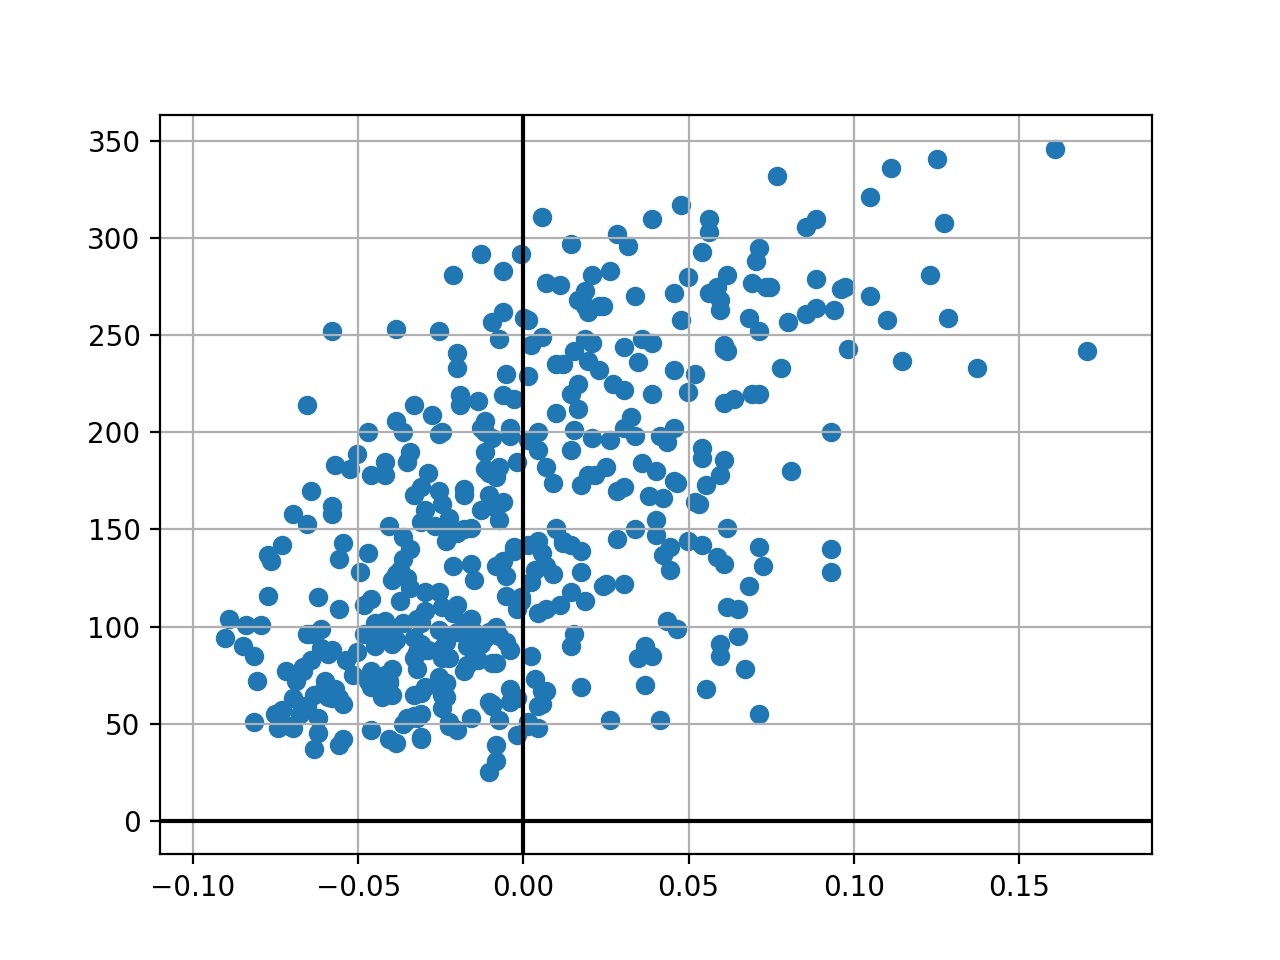

In [245]:
X = diabetes_dataset['data'][:,np.newaxis,2]
y = diabetes_dataset['target'][:,np.newaxis]

fig, ax = plt.subplots()
ax.scatter(X, y)
# ax.set_aspect('equal')
ax.grid(True, which='both')

ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

#### Picking good parameters

Given that $m$ is the slope of the linear model and $b$ is the y-intercept, can you guess the parameters that would best fit the average diabetes progession? Try by changing the parameter dictionary below:

<IPython.core.display.Javascript object>


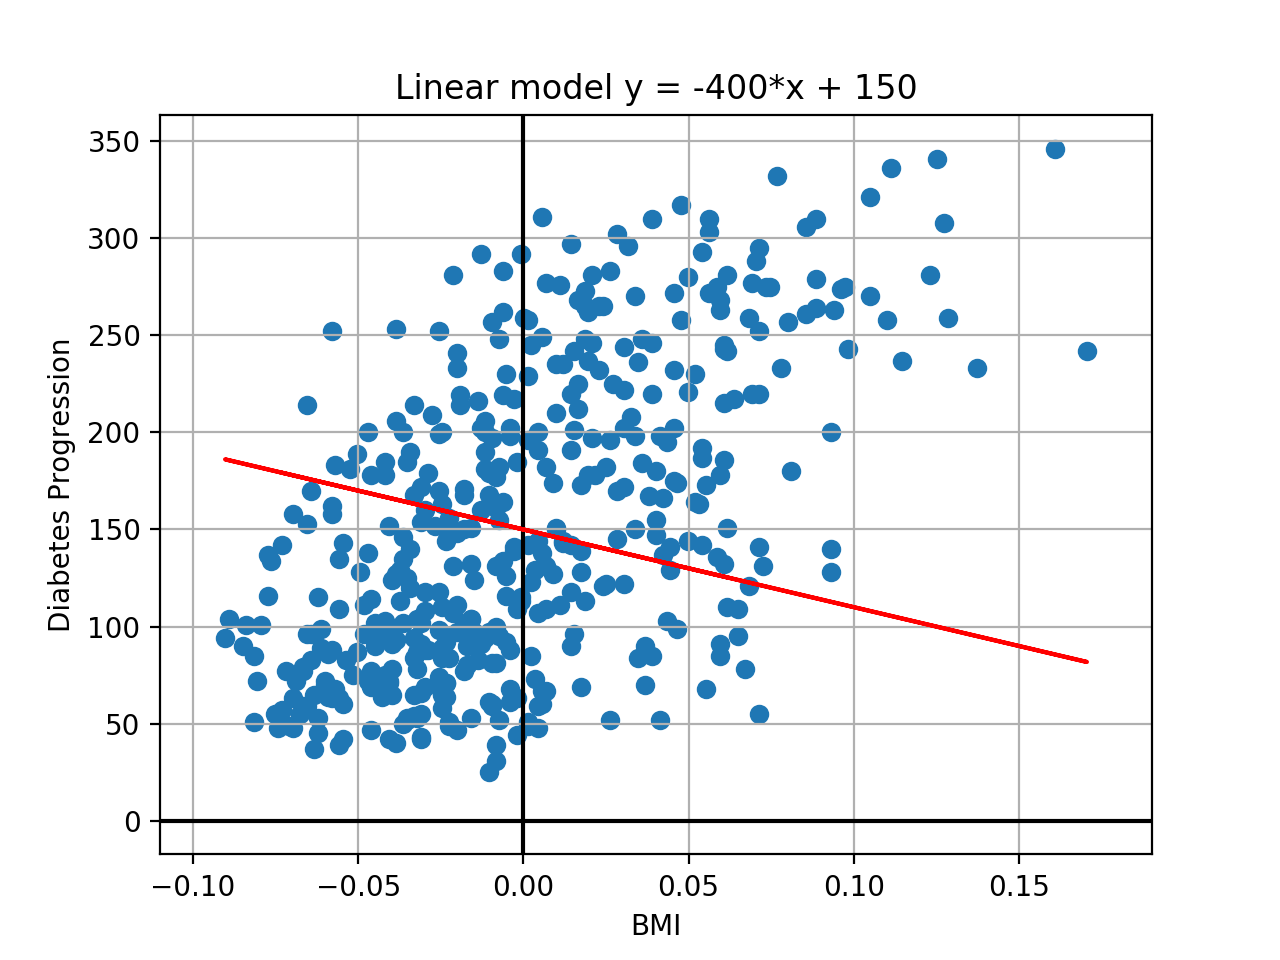

Text(0,0.5,'Diabetes Progression')

In [246]:
# change m and b values below to visualize your line guess
guess_params = {"m":-400, "b":150}


guess_line_function = create_linear_model(guess_params)
fig, ax = plt.subplots()
ax.scatter(X, y)
# ax.set_aspect('equal')
ax.grid(True, which='both')

ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
start = np.min(X)
stop = np.max(X)
preds = np.array([guess_line_function(x) for x in X])
ax.plot(X, preds, c='r')
ax.set_title(f"Linear model y = {guess_params['m']}*x + {guess_params['b']}")
ax.set_xlabel("BMI")
ax.set_ylabel("Diabetes Progression")

We need to qualify which parameters are good guesses, and which are bad. To do this, we have to use a **loss function**, a function that compares how far off predicted targets are from the real targets. Good parameters should give predictions that have a small loss, while bad parameters should give a large loss.

For regression, we often use the **mean squared error**, or **mse** as a loss function. This is the average squared difference between predictions and labels:

In [74]:
def mse(preds, y):
    return np.mean((preds - y)**2)

Now that we have a way of measuring how good our model is performing, let's try again to find the best parameters. See if you can find them.

<IPython.core.display.Javascript object>


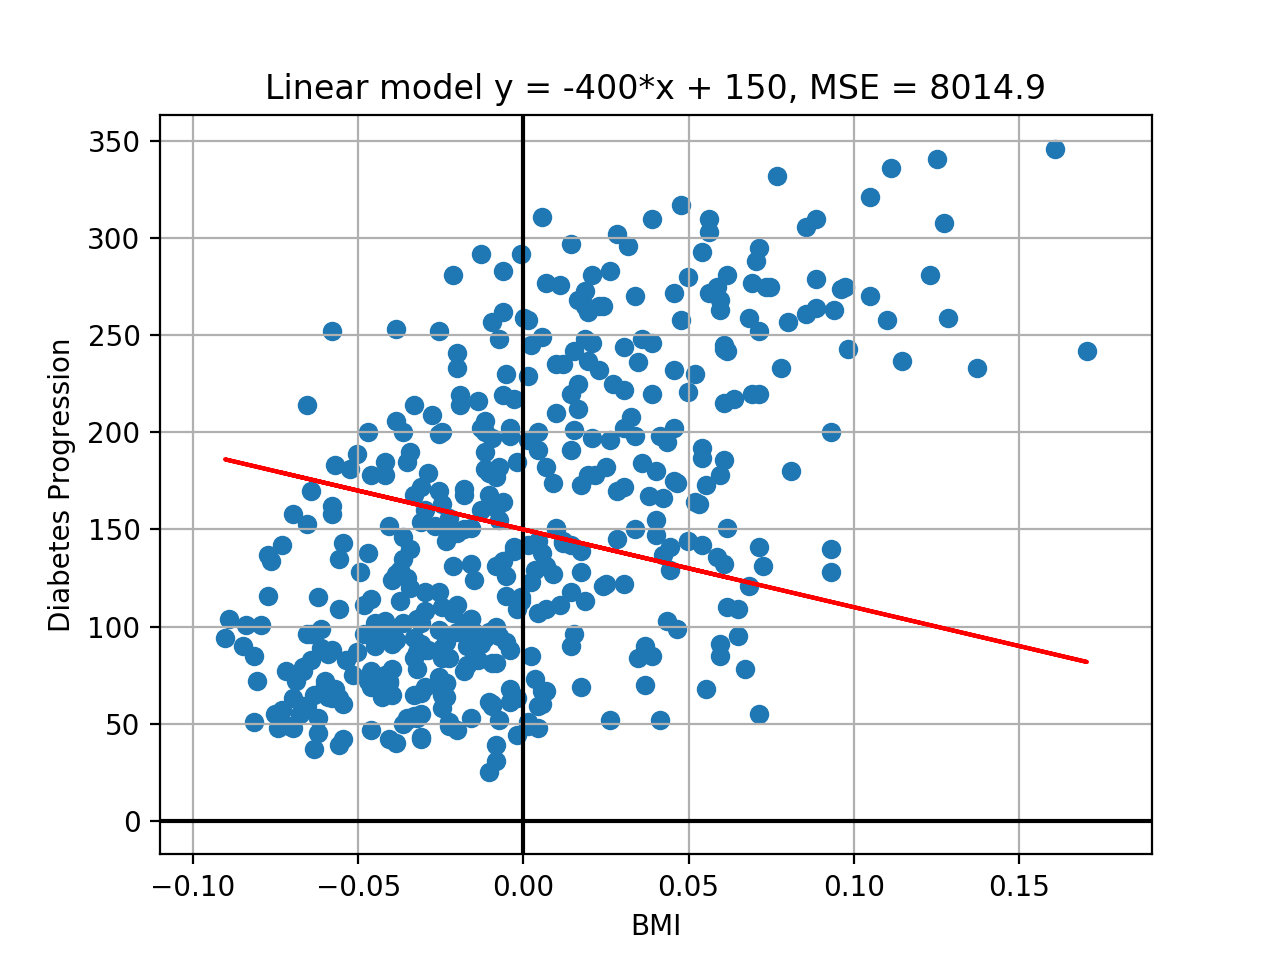

Text(0,0.5,'Diabetes Progression')

In [247]:
# change m and b values below to visualize your guess and get a loss value
guess_params = {"m":-400, "b":150}


guess_line_function = create_linear_model(guess_params)
fig, ax = plt.subplots()
ax.scatter(X, y)
# ax.set_aspect('equal')
ax.grid(True, which='both')

ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
start = np.min(X)
stop = np.max(X)
preds = np.array([guess_line_function(x) for x in X])
ax.plot(X, preds, c='r')
ax.set_title(f"Linear model y = {guess_params['m']}*x + {guess_params['b']}, MSE = {np.round(mse(preds, y), decimals=1)}")
ax.set_xlabel("BMI")
ax.set_ylabel("Diabetes Progression")

#### Learning the best parameters

Rather than guessing, machine learning let's us *learn* the correct parameters or algorithms for our models, given labeled data. Machine learning models find the parameters or algorithm that minimize the loss function between the data labels, and the predicted values. This process is called **training** or **fitting**.

We can use the <tt>LinearRegression</tt> model in scikit-learn to fit a linear regression model to our data and find the best param

In [248]:
lr_model = LinearRegression()
lr_model.fit(X, y)
print(f"Best parameters: m = {lr_model.coef_[0,0]}, b = {lr_model.intercept_[0]}")

Best parameters: m = 949.4352603839491, b = 152.1334841628967


Plot the best parameters:

<IPython.core.display.Javascript object>


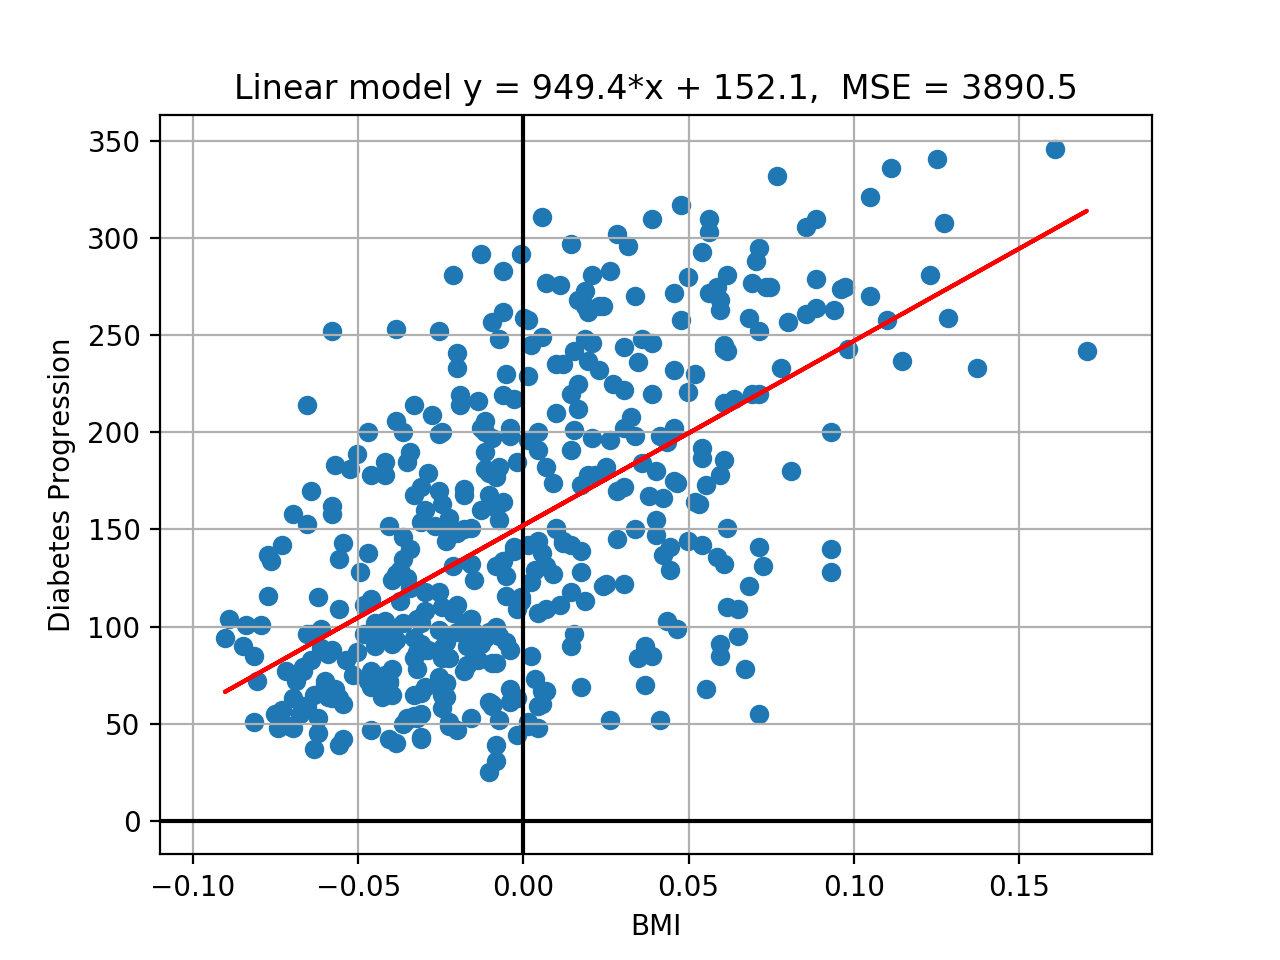

In [249]:
best_params = {"m":lr_model.coef_[0,0], "b":lr_model.intercept_[0]}

best_line_function = create_linear_model(best_params)
fig, ax = plt.subplots()
ax.scatter(X, y)
ax.grid(True, which='both')

ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
start = np.min(X)
stop = np.max(X)
preds = np.array([best_line_function(x) for x in X])
ax.set_title(f"Linear model y = {np.round(best_params['m'], 1)}*x + {np.round(best_params['b'], 1)},\
  MSE = {np.round(mse(preds, y), decimals=1)}")
ax.set_xlabel("BMI")
ax.set_ylabel("Diabetes Progression")
ax.plot(X, preds, c='r')

How do we know these are the best parameters?

If we test out a grid of parameters, and calculate their corresponding mse's, we can plot the loss surface as a function of parameters m and b:

(You can grab the plot below and move it)

<IPython.core.display.Javascript object>


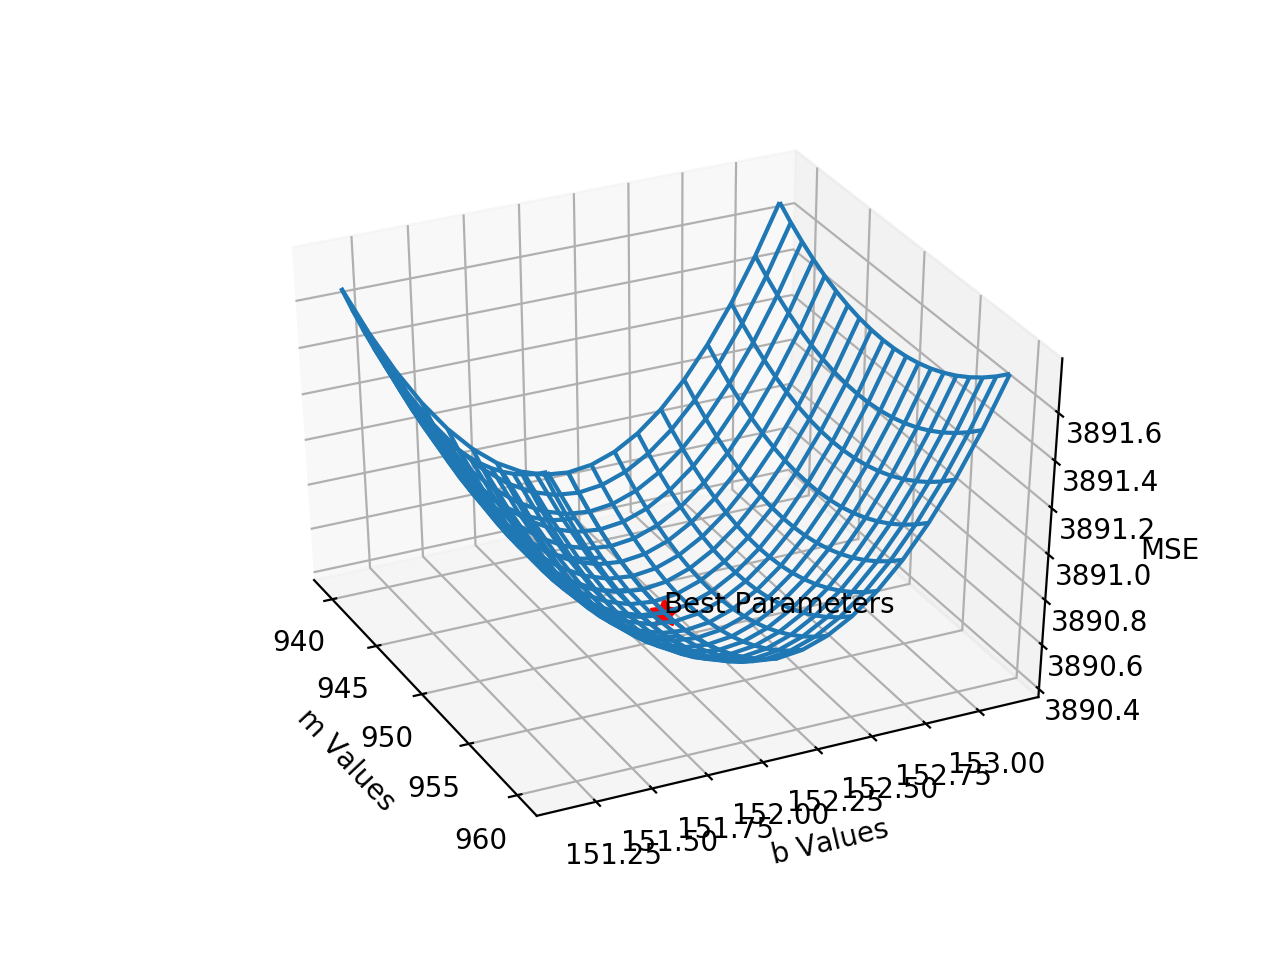

In [250]:
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
m_range = np.concatenate([np.linspace(best_params['m'] - 10, best_params['m'], num=10),
                          np.linspace(best_params['m'] + 1, best_params['m'] + 11, num=10)])

b_range = np.concatenate([np.linspace(best_params['b'] - 1, best_params['b'], num=10),
                          np.linspace(best_params['b'], best_params['b'] + 1, num=10)])

m_grid, b_grid = np.meshgrid(m_range, b_range)
zs = []
for m,b in zip(np.ravel(m_grid), np.ravel(b_grid)):
    linear_model = create_linear_model({"m":m, "b":b})
    tmp_preds = np.array([linear_model(x) for x in X])
    zs.append(mse(tmp_preds, y))
zs = np.array(zs)
Z = zs.reshape(m_grid.shape)

ax.plot_wireframe(m_grid, b_grid, Z)
ax.scatter(best_params['m'], best_params['b'], mse(preds, y), s=100, marker=(5,1), c='r')
ax.text(best_params['m'], best_params['b'], mse(preds, y), "Best Parameters", zorder=1)

ax.set_xlabel('m Values')
ax.set_ylabel('b Values')
ax.set_zlabel('MSE')

plt.show()

In linear regression, the loss function is convex, and the best parameters are the global minima seen above. When scikit-learns's <tt>LinearRegression</tt> model trains on <tt>X</tt>, it finds those parameters using a method called Ordinary Least Squares, or OLS.

As we'll see, finding the best parameters or algorithm for a machine learning model is not always as straight forward.

## Part 2: Decision Tree Classification

Now that we understand some of the concepts behind ML, we can move on to a more advanced use case. Let's define some of the core attributes:
* **Task**: classifying features
* **Model**: Decision Tree
* **Loss function**: Gini Impurity

Let's look at our data set:

In [126]:
iris_dataset = load_iris()
print(iris_dataset['DESCR'])

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

We're going to use a decision tree to classify plant features into one of three iris plant types:
* Features:
 * Sepal Length
 * Sepal Width
 * Petal Length
 * Petal Width
* Target
 * Iris Plant Type
 
A decision tree is a tree-based model that uses splitting rules to predict a value for a given set of features. Like the parameters in a linear regression model, these splitting rules are learned by training on a labeled data set, and are chosen to optimize a loss function or metric (called criterion for scikit-learn's <tt>DecisionTreeClassifier</tt>).

In this case, we use a metric called the "gini impurity". Put simply, it's a measurement of the likelihood of incorrect classification. The decision tree algorithm iteratively chooses values and features to split on in order to minimize this value.

Let's train a decision tree classifier on this dataset.

In [183]:
X, y = iris_dataset['data'], iris_dataset['target'][:,np.newaxis]

tree_classifier = DecisionTreeClassifier()
tree_classifier = tree_classifier.fit(X, y)

Let's use the built-in <tt>score</tt> method to calculate the accuracy of our trained model:

In [184]:
print(f"Accuracy of trained decision tree: {100*tree_classifier.score(X, y)}%")

Accuracy of trained decision tree: 100.0%


Wow, that's very good. It's actually **too good**... more on that soon.

But first, now that we've trained the classifier, we can plot the decision tree and the splitting rules it learned for the data set:

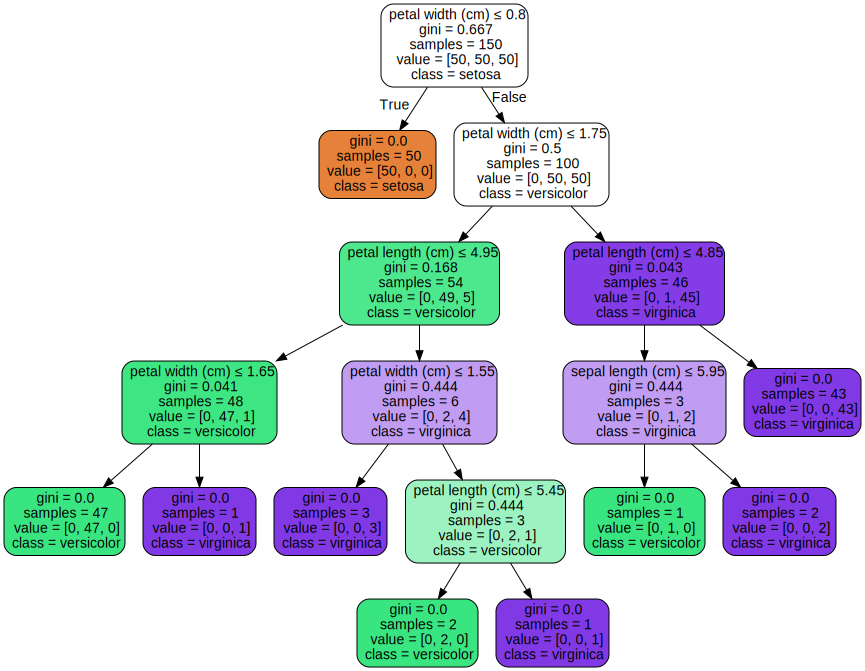

In [185]:
dot_data = export_graphviz(tree_classifier, out_file=None, 
                     feature_names=iris_dataset['feature_names'],  
                     class_names=iris_dataset['target_names'],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

We can see that the tree has, at maximum, 5 rules to get to a prediction. This is called the **max depth**.

### Overfitting

Recall that our model achieved 100% accuracy on our training dataset. That sounds like a good thing, but it's actually not. When we train predictive models, we want them to be able to perform well on **unseen data**; that is, we want the rules the decision tree learns to **generalize** well to data it's never seen before. Our 100% accuracy means the model learned rules overly specific to the training set, but likely won't hold up to new data points. This phenomena is called **overfitting**.

To visualize this, let's retrain the model using only two features so we can easily plot the decision boundaries:

<IPython.core.display.Javascript object>


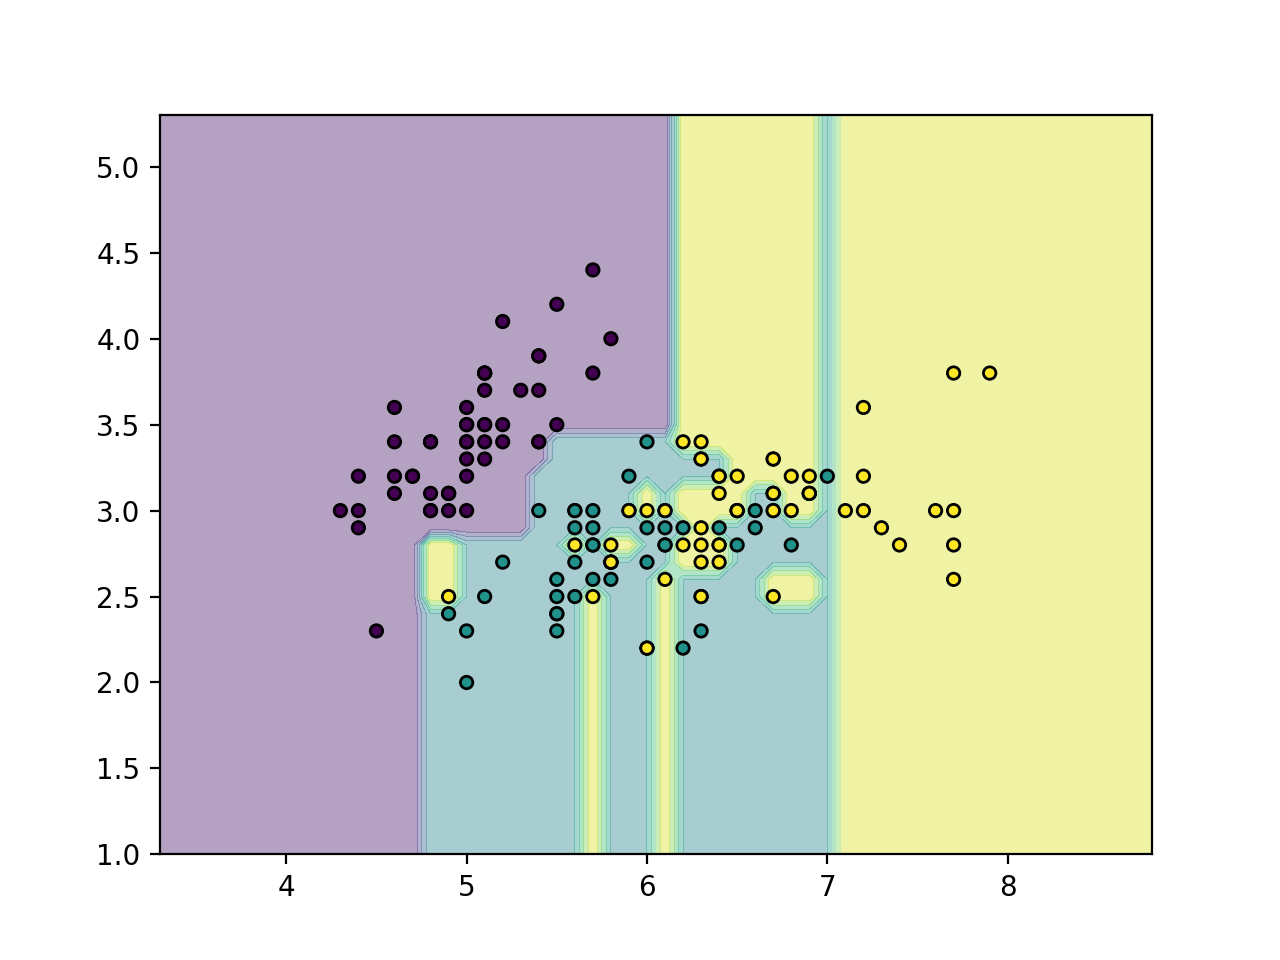

In [186]:
# visualization code from https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html 
sample_X = iris_dataset.data[:, [0, 1]]
sample_y = iris_dataset.target

x_min, x_max = sample_X[:, 0].min() - 1, sample_X[:, 0].max() + 1
y_min, y_max = sample_X[:, 1].min() - 1, sample_X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots()

clf = DecisionTreeClassifier()
clf.fit(sample_X, sample_y)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

axarr.contourf(xx, yy, Z, alpha=0.4)
axarr.scatter(sample_X[:, 0], sample_X[:, 1], c=sample_y,
                              s=20, edgecolor='k')

plt.show()

With a decision tree classifier, our splitting rules divide the space into regions corresponding to each class. As you can see, the region is chopped up in such a way to ensure 100% accuracy, but it doesn't make much sense at all.

Here's an example of a better classifier:

<IPython.core.display.Javascript object>


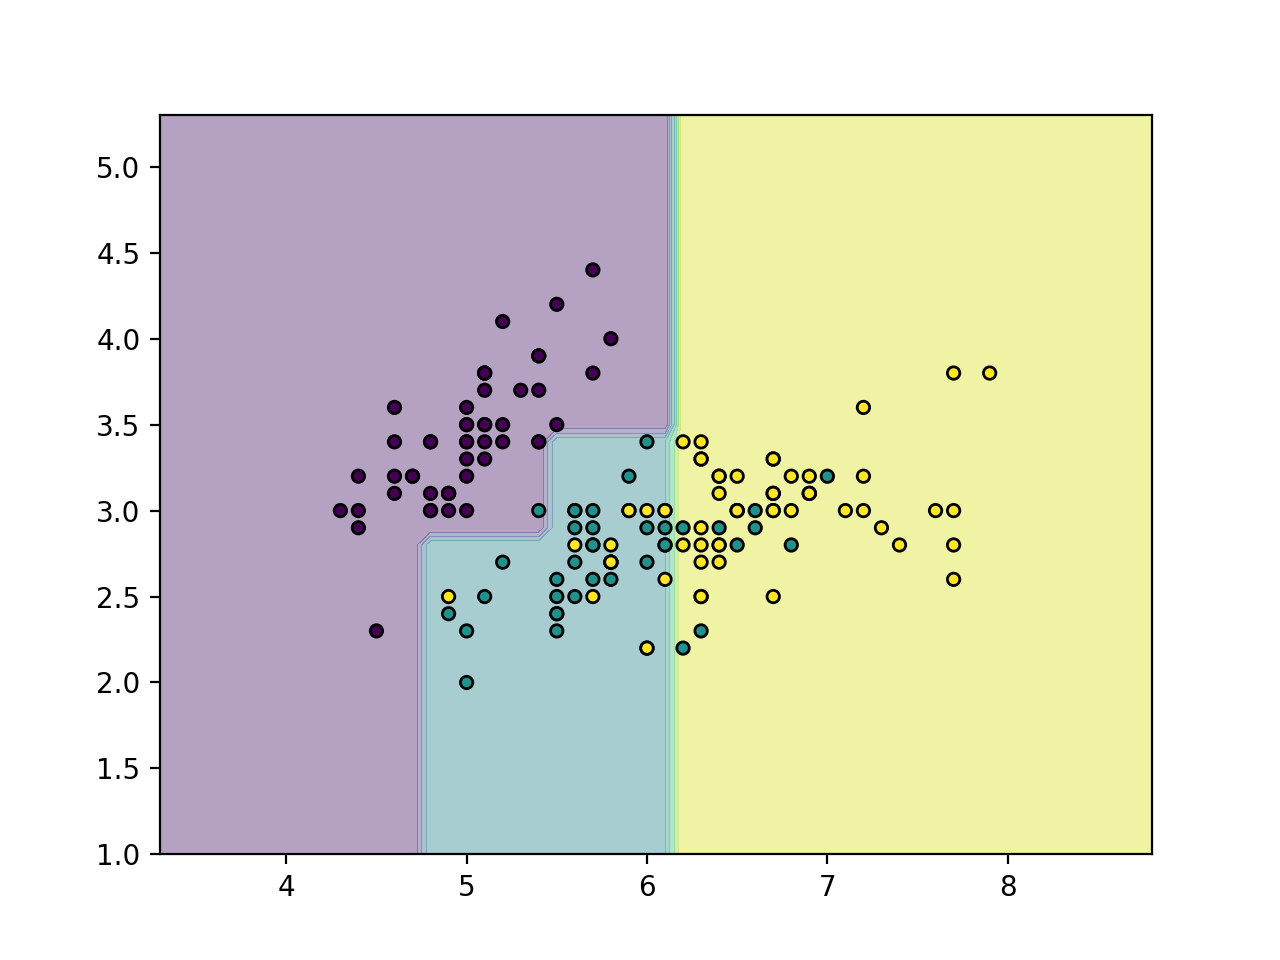

In [187]:
# visualization code from https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html 
sample_X = iris_dataset.data[:, [0, 1]]
sample_y = iris_dataset.target

x_min, x_max = sample_X[:, 0].min() - 1, sample_X[:, 0].max() + 1
y_min, y_max = sample_X[:, 1].min() - 1, sample_X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots()

clf = DecisionTreeClassifier(max_depth=3)
clf.fit(sample_X, sample_y)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

axarr.contourf(xx, yy, Z, alpha=0.4)
axarr.scatter(sample_X[:, 0], sample_X[:, 1], c=sample_y,
                              s=20, edgecolor='k')

plt.show()

The boundaries seem more **generic**, rather than fitting to the random noise in the data.

Let's return to our original model. There are two approaches that together help overfitting:
* Validation
* Hyperparameter tuning

### Validation

We want our model to generalize well, but we are measuring it's performance on the data it used to train on. We need to measure it's performance on data **it's never seen**. There are different ways to do this, but we'll use a simple one: we're going to hold out 20% of the training data and validate the model's performance on this hold out, which we call **validation data**.

In [233]:
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.3)

In [234]:
tree_classifier = DecisionTreeClassifier()
tree_classifier = tree_classifier.fit(train_X, train_y)

Now we can compare metrics between training data and validation.

In [243]:
print(f"Accuracy on training data: {tree_classifier.score(train_X, train_y)}.\
  Accuracy on validation data: {tree_classifier.score(val_X, val_y)}")

Accuracy on training data: 1.0.  Accuracy on validation data: 0.9555555555555556


As expected, when left to overfit the model doesn't perform as well on data it's never seen before.

In [236]:
tree_classifier.score(val_X, val_y)

0.9555555555555556

### Hyperparameter Tuning

How do we prevent our model from overfitting?

When we train or fit our models, we use certain training algorithms that have their own set of rules or parameters. We call these **hyperparameters**, parameters that are not part of the model itself but change how the model is trained. The process of altering these hyperparameters to achieve the best validation performance for a model is called **hyperparameter tuning**, and it's at the core of machine learning.

Let's look at the scikit-learn <tt>DecisionTreeClassifier</tt> [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) to understand some of the hyperparameters used in this algorithm.

There are about 13 different hyperparameters. We can see by default, <tt>max_tree_depth</tt> and <tt>min_samples_split</tt> are <tt>None</tt> and <tt>2</tt> respectively. These default settings almost guarantee that a decision tree will overfit, because there are no limitations on how deep to let the tree grow and it won't stop until every leaf (terminal node) of the tree has exactly one value in it.
